In [1]:
pwd

'/Users/macrebirth/Desktop/CBH/optimal-ph'

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.utils import shuffle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error


In [7]:
df = pd.read_csv('/Users/macrebirth/Desktop/CBH/optimal-ph/data/train_set.csv')

In [8]:
shuffle_df=shuffle(df,random_state=42)

In [9]:
label_mapping = {}
ph = 0.0
ctr = 0
while ph <= 14.0:
    label_mapping[str(round(ph,1))] = ctr
    ctr += 1
    ph += 0.1

In [11]:
label_mapping_inv = {}
for key in label_mapping:
    label_mapping_inv[label_mapping[key]] = key

In [12]:
new_df = []
max_7_ph = 10000
count_7_ph = 0

for idx,row in shuffle_df.iterrows():
    if row.mean_growth_PH ==7.0:
        if count_7_ph<max_7_ph:
            new_df.append({
                'mean_growth_PH':row.mean_growth_PH,
                'sequence':row.sequence,
                'PH_class':label_mapping[str(round(row.mean_growth_PH,1))]
            })
            count_7_ph+=1
    else:
        new_df.append({
                'mean_growth_PH':row.mean_growth_PH,
                'sequence':row.sequence,
                'PH_class':label_mapping[str(round(row.mean_growth_PH,1))]
            })
        count_7_ph+=1

In [14]:
subdf = pd.DataFrame(new_df)
subdf

,mean_growth_PH,sequence,PH_class
0,7.0,MKSPAPSRPQKMALIPACIFLCFAALSVQAEETPVTPQPPDILLGP...,70
1,7.5,MAVARKSRGTRVRHLGLAGRTGTMLLAAGIGVLSPASVALPAWAQQ...,75
2,7.8,MSRSLSLSAYLAYARRAGRAGPVPDQVRPPGPLIWAHAVDAARADT...,78
3,7.0,MMISLSPKPACLTLLLGLLAGAVHASPPTDLSLTRWAEKTVFKAQS...,70
4,7.0,MKHKLIATGILAGAILSYSSNILADTHKFPDVPTWADKSVNYLVDK...,70
...,...,...,...
41794,6.0,MIQFSALQRFTMRFMVAAVCCAFTFASQAQTSQAPHMEEHDGHHAL...,60
41795,6.6,MRFDARAALRRCGSAVLALIMGASLVSAEAAADDAPPAKELFGAKG...,66
41796,8.0,MTNLTLAFSTIFVVALVAMVSTKLWLASRQIRYVAAHRNGVPAQFS...,80
41797,6.5,MYNRVSDRSTRPNQADEPSGSADGYEFAQALTDLAQRESPPCGELS...,65


In [15]:
train_df = subdf.loc[0:38000]
test_df= subdf.loc[38000:]

In [16]:
tfidfvectorizer = TfidfVectorizer(analyzer='char',ngram_range=(3,3))
tfidf = tfidfvectorizer.fit_transform(train_df.sequence)

In [17]:
regr = LinearRegression().fit(tfidf,train_df.mean_growth_PH)

In [18]:
classifier = SGDClassifier().fit(tfidf, train_df.PH_class)

In [19]:
y_pred = regr.predict(tfidf)
y_pred_classifier = classifier.predict(tfidf)
y_pred_classifier_float = []
for idx, row in train_df.iterrows():
    if idx < 100:
        print(row.mean_growth_PH, y_pred[idx], y_pred_classifier[idx], label_mapping_inv[y_pred_classifier[idx]])
    y_pred_classifier_float.append(float(label_mapping_inv[y_pred_classifier[idx]]))

res1 = np.sqrt(mean_squared_error(train_df.mean_growth_PH, y_pred))
res2 = np.sqrt(mean_squared_error(train_df.mean_growth_PH, y_pred_classifier_float))


7.0 6.953864772085545 70 7.0
7.5 7.023744266432794 75 7.5
7.8 7.03550922636619 65 6.5
7.0 7.063294476209727 71 7.1
7.0 7.2571862019076026 70 7.0
7.0 7.647729158718111 70 7.0
7.0 7.131421419525632 70 7.0
7.0 6.250406314220321 65 6.5
7.0 6.94991519866118 70 7.0
6.2 6.074345021145593 62 6.2
7.0 7.030573387562143 70 7.0
7.0 7.900048357957083 70 7.0
7.0 6.933568839762847 70 7.0
6.5 6.08117566192979 65 6.5
7.0 7.242489423405829 75 7.5
6.8 7.035493374629592 68 6.8
7.0 6.484123744553066 70 7.0
7.0 7.07063221158321 70 7.0
7.0 6.493817579404778 70 7.0
8.9 8.822160019755055 89 8.9
6.8 6.899185810507393 68 6.8
6.5 6.570772201646779 65 6.5
7.0 6.955650485063839 70 7.0
7.0 6.999888124026462 70 7.0
7.4 7.326243631848083 74 7.4
8.5 6.791811986158733 65 6.5
7.0 7.212108835281511 70 7.0
4.5 4.555373731184884 45 4.5
7.0 5.994039590032508 70 7.0
7.0 7.041429647560424 70 7.0
7.0 7.257539332019869 70 7.0
7.14 7.3068397264703195 71 7.1
7.0 6.683247638886601 70 7.0
7.45 7.182764667904919 75 7.5
7.0 7.17939518

In [20]:
tfidf_test = tfidfvectorizer.transform(test_df.sequence)

In [24]:
pred1 = regr.predict(tfidf_test)
pred2 = classifier.predict(tfidf_test)
y_pred_classifier_float_2 = []
idx = 0
for _, row in test_df.iterrows():
    if idx < 100:
        print(row.mean_growth_PH, pred1[idx], pred2[idx], label_mapping_inv[pred2[idx]])
    y_pred_classifier_float_2.append(float(label_mapping_inv[pred2[idx]]))
    idx +=1

res3 = np.sqrt(mean_squared_error(test_df.mean_growth_PH, pred1))
res4 = np.sqrt(mean_squared_error(test_df.mean_growth_PH, y_pred_classifier_float_2))

6.5 6.427426352779364 65 6.5
7.2 7.491304013362893 69 6.9
6.8 6.753462494489433 68 6.8
7.14 7.120362078571763 71 7.1
7.5 5.537423451810852 59 5.9
7.4 6.205604867796813 65 6.5
7.8 6.074559652693351 65 6.5
6.8 6.594339091389632 68 6.8
6.8 6.6944020189379785 65 6.5
6.0 5.429484178256273 70 7.0
7.5 8.633136778306733 85 8.5
6.5 6.795916207670396 65 6.5
8.0 7.583482175570528 65 6.5
6.75 6.582205196277017 68 6.8
6.5 6.703977253510292 71 7.1
7.2 6.841256034666995 71 7.1
6.0 6.5256255701030215 65 6.5
6.5 6.080769512278273 65 6.5
7.2 7.240576808764336 75 7.5
6.2 8.39161254597916 74 7.4
8.0 6.998486686282064 75 7.5
6.2 4.770619577098601 80 8.0
8.0 7.363867191490614 65 6.5
6.0 6.954645471361883 78 7.8
4.5 4.916570126147665 45 4.5
7.2 5.6131434257432895 65 6.5
6.5 6.848658456257496 65 6.5
6.8 6.787473024422942 68 6.8
6.0 4.261159617917704 60 6.0
8.0 8.824972794212682 75 7.5
1.9 3.8410176336406066 70 7.0
6.6 6.506498754935133 66 6.6
6.8 6.78700557847116 68 6.8
6.8 7.002437024438552 68 6.8
8.0 7.8919

In [22]:
print(res3,res4)

0.9283512376585394 0.906892674996338


In [23]:
import seaborn as sns

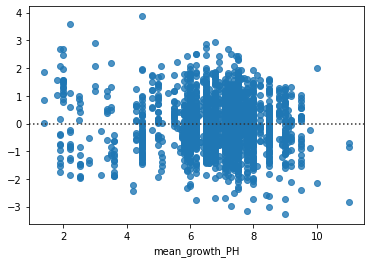

In [25]:
sns.residplot(test_df.mean_growth_PH,pred1)

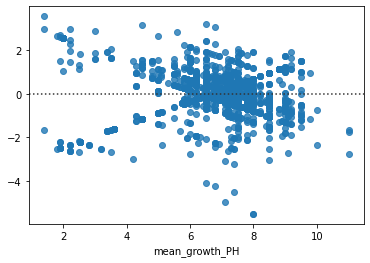

In [26]:
sns.residplot(test_df.mean_growth_PH, y_pred_classifier_float_2)

In [27]:
df

,mean_growth_PH,sequence
0,7.0,MKKRAHIISFILILALLFTGCSGNKENTSKEPVKETTEKGTGNIKT...
1,7.0,MGKGKRKKRIALYFKRAAVAMLVMVMLLQPIPGTAGSSVKSVEAAV...
2,7.0,MKVNNKNSARKLLSLFLGLVLIFSTLSFSNQAAAADKGTWAPNTTY...
3,7.0,MRKKVTAVLTALVLTVSSILANPFAYPDAVKADTEGNPAAASNSNG...
4,7.0,MKRQSRIISFLVAVIMIATVIMPATVVQANASGVFIRVNQVGYKPS...
...,...,...
104996,7.8,MPYRSNTYPRANRRSKSATFSTLLTILFIASHFAFGGIPASASMDG...
104997,7.8,MRMGKVEVSLVVVVGASMTALAVFGVLPKDPVPPAIAKATLWTPAP...
104998,7.8,MTTTLPTPHRFTGLALSAALATTTVLTLSPSAVLAVPAGGYGDLVE...
104999,7.8,MRDFQAPGRSAVLATNGMCATSHPLAAQAAIDILKRGGNAMDAAIA...


In [35]:
new_df_2 = []
for idx,row in df.iterrows():
    new_df_2.append({
        'mean_growth_PH':row.mean_growth_PH,
        'sequence':row.sequence,
        'PH_class':label_mapping[str(round(row.mean_growth_PH,1))]
    })
new_df_2 =pd.DataFrame(new_df_2)
new_df_2

,mean_growth_PH,sequence,PH_class
0,7.0,MKKRAHIISFILILALLFTGCSGNKENTSKEPVKETTEKGTGNIKT...,70
1,7.0,MGKGKRKKRIALYFKRAAVAMLVMVMLLQPIPGTAGSSVKSVEAAV...,70
2,7.0,MKVNNKNSARKLLSLFLGLVLIFSTLSFSNQAAAADKGTWAPNTTY...,70
3,7.0,MRKKVTAVLTALVLTVSSILANPFAYPDAVKADTEGNPAAASNSNG...,70
4,7.0,MKRQSRIISFLVAVIMIATVIMPATVVQANASGVFIRVNQVGYKPS...,70
...,...,...,...
104996,7.8,MPYRSNTYPRANRRSKSATFSTLLTILFIASHFAFGGIPASASMDG...,78
104997,7.8,MRMGKVEVSLVVVVGASMTALAVFGVLPKDPVPPAIAKATLWTPAP...,78
104998,7.8,MTTTLPTPHRFTGLALSAALATTTVLTLSPSAVLAVPAGGYGDLVE...,78
104999,7.8,MRDFQAPGRSAVLATNGMCATSHPLAAQAAIDILKRGGNAMDAAIA...,78


In [38]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test,y_train, y_test = train_test_split(new_df_2.sequence, new_df_2.PH_class, test_size=0.33, random_state=42)

In [66]:
X_train

16299     MEIIPSSRFRGTWKYIRAFAFISLILAIFFTVALAGLIAFAKLKGA...
101624    MKRSYLTISMACLVLAGCANSEQEYPKVALEAKYPNARSLAHFDDY...
92356     MSNNVSAKIIIATHKQYHFPSDSIYLPLHVGKVDKKDLGLNGDDTG...
74618     MKIRALLVAMSVATVLTGCQNMDSNRLLSSGAEAFQAYSLSDAQVK...
17966     MYAPFFIRFLLSTLTLSILIVVILLAKKVFKKHISAKYQYNIGFIL...
                                ...                        
54886     MTNLTLAFSTIFVVALVAMVSTKLWLASRQIRYVAAHRNGVPAQFS...
76820     MLFTASVSAALPARYMQTIENAAIWAQIGDKMVTVGNIRAGQIIAV...
103694    MYNRVSDRSTRPNQADEPSGSADGYEFAQALTDLAQRESPPCGELS...
860       MNSIDRTSVLGAGLLLALGCMPLPVAAQSDPSRETATTGWATQNGG...
15795     MKSYSKKMLVGVSFASLMLGSFQGVSLAEDTKGEQVSYRNVLKMEP...
Name: sequence, Length: 70350, dtype: object

In [67]:
tfidfvectorizer = TfidfVectorizer(analyzer='char',ngram_range=(3,3))
tfidf = tfidfvectorizer.fit_transform(X_train)
print(tfidf.shape)

(70350, 8740)


In [69]:
classifier = SGDClassifier().fit(tfidf, y_train)

In [71]:
tfidf = tfidfvectorizer.transform(X_test)

In [73]:
pred = classifier.predict(tfidf)


In [98]:
y_pred_classifier_float_2 = []
y_test_float = list(y_test)
y_test_float_3=[]
for i in range(len(X_test)):
    y_pred_classifier_float_2.append(float(label_mapping_inv[pred[i]]))
    y_test_float_3.append(float(label_mapping_inv[y_test_float[i]]))

res5 = np.sqrt(mean_squared_error(y_test_float_3, y_pred_classifier_float_2))

In [99]:
res5

0.591710165563486

In [100]:
import pickle

In [108]:
filename=[]
filename.append('model.pickle')
pickle.dump(classifier, open(filename[0], 'wb'))

In [105]:
classifier.score(tfidf,y_test)

0.776283512741335

In [106]:
from scipy import stats

In [107]:
stats.spearmanr(y_test_float_3, y_pred_classifier_float_2)


SpearmanrResult(correlation=0.5038580324042762, pvalue=0.0)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from model import BaselineModel

# Load data set
with open('data/train_set.csv', 'rb') as train_data:
    df = pd.read_csv(train_data, nrows=1000)
    
label_mapping = {}
ph = 0.0
ctr = 0
while ph <= 14.0:
    label_mapping[str(round(ph,1))] = ctr
    ctr += 1
    ph += 0.1
    
label_mapping_inv = {}
for key in label_mapping:
    label_mapping_inv[label_mapping[key]] = key
    
    
new_df_2 = []
for idx,row in df.iterrows():
    new_df_2.append({
        'mean_growth_PH':row.mean_growth_PH,
        'sequence':row.sequence,
        'PH_class':label_mapping[str(round(row.mean_growth_PH,1))]
    })
new_df_2 =pd.DataFrame(new_df_2)

X_train, X_test,y_train, y_test = train_test_split(new_df_2.sequence, new_df_2.PH_class, test_size=0.33, random_state=42)

tfidfvectorizer = TfidfVectorizer(analyzer='char',ngram_range=(3,3))
tfidf = tfidfvectorizer.fit_transform(X_train)

BaselineModel(model_file_path='src/model.pickle').train(tfidf,y_train)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
import pickle


class BaselineModel:
    def __init__(self, model_file_path):
        self.model_file_path = model_file_path


    def train(self,X, df_train):
       

        model = SGDClassifier()
        model.fit(X, df_train)

        with open(self.model_file_path, 'wb') as model_file:
            pickle.dump(model, model_file)

    def predict(self, df_test, tfidvectorizer):
        with open(self.model_file_path, 'rb') as model_file:
            model: tree.DecisionTreeRegressor = pickle.load(model_file)
                
        tfidf = tfidfvectorizer.transform(df_test.sequence)
        
        return model.predict(tfidf)


In [ ]:
import argparse
import pandas as pd
from model import BaselineModel

parser = argparse.ArgumentParser()
parser.add_argument('--input_csv', default='input.csv')
args = parser.parse_args()

# Config
output_file_path = 'predictions.csv'

# Load input.csv
with open(args.input_csv) as input_csv:
    df = pd.read_csv(input_csv)

# Run predictions
y_predictions = BaselineModel(model_file_path='src/model.pickle').predict(df)

y_pred_classifier_float_2 = []
y_test_float = list(y_test)
y_test_float_3=[]
for i in range(len(X_test)):
    y_pred_classifier_float_2.append(float(label_mapping_inv[y_predictions[i]]))
    y_test_float_3.append(float(label_mapping_inv[y_test_float[i]]))

# Save predictions to file
df_predictions = pd.DataFrame({'prediction': y_pred_classifier_float_2})
df_predictions.to_csv(output_file_path, index=False)

print(f'{len(y_predictions)} predictions saved to a csv file')
